## Soil Moisture Status Prediction

Soil moisture monitoring provides information about the water moisture status of soil. Two important parameters that effects the soil moisture is temperature and pressure.


This dataset contains  temperature, humidity soil moisture and the status of irrigation and using this dataset we have to predict the soil moisture of the soil and the required pump status.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Importing the dataset

In [2]:
df=pd.read_csv("soil.csv.csv")
print(df.shape)
df.head()

(501, 4)


,Soilresistance,temperature,Humidity,Irrigation
0,400,30,15,0
1,200,30,32,0
2,300,21,28,0
3,500,40,22,0
4,700,23,34,0


In [3]:
df["moisture"]=(1-(df["Soilresistance"]/1024))*100
df.head()

,Soilresistance,temperature,Humidity,Irrigation,moisture
0,400,30,15,0,60.937500
1,200,30,32,0,80.468750
2,300,21,28,0,70.703125
3,500,40,22,0,51.171875
4,700,23,34,0,31.640625


In [4]:
del df["Soilresistance"]

In [5]:
df

,temperature,Humidity,Irrigation,moisture
0,30,15,0,60.937500
1,30,32,0,80.468750
2,21,28,0,70.703125
3,40,22,0,51.171875
4,23,34,0,31.640625
...,...,...,...,...
496,25,19,1,34.082031
497,23,17,0,79.492188
498,25,18,0,61.132812
499,24,18,1,33.789062


In [6]:
print(df.columns)
df.info()

Index(['temperature', 'Humidity', 'Irrigation', 'moisture'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  501 non-null    int64  
 1   Humidity     501 non-null    int64  
 2   Irrigation   501 non-null    int64  
 3   moisture     501 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.8 KB


In [7]:
# Counting null values along each column
df.isnull().sum()

temperature    0
Humidity       0
Irrigation     0
moisture       0
dtype: int64

In [8]:
df.describe()

,temperature,Humidity,Irrigation,moisture
count,501.000000,501.000000,501.000000,501.000000
mean,24.682635,39.381238,0.393214,59.825076
std,12.111527,22.618231,0.488952,19.443319
min,14.000000,11.000000,0.000000,3.320312
25%,20.000000,19.000000,0.000000,45.898438
50%,24.000000,32.000000,0.000000,63.964844
75%,28.000000,65.000000,1.000000,77.539062
max,263.000000,85.000000,1.000000,88.281250


In [9]:
corr=df.corr()
corr

,temperature,Humidity,Irrigation,moisture
temperature,1.000000,-0.350852,0.102169,-0.086820
Humidity,-0.350852,1.000000,-0.190810,0.236571
Irrigation,0.102169,-0.190810,1.000000,-0.690537
moisture,-0.086820,0.236571,-0.690537,1.000000


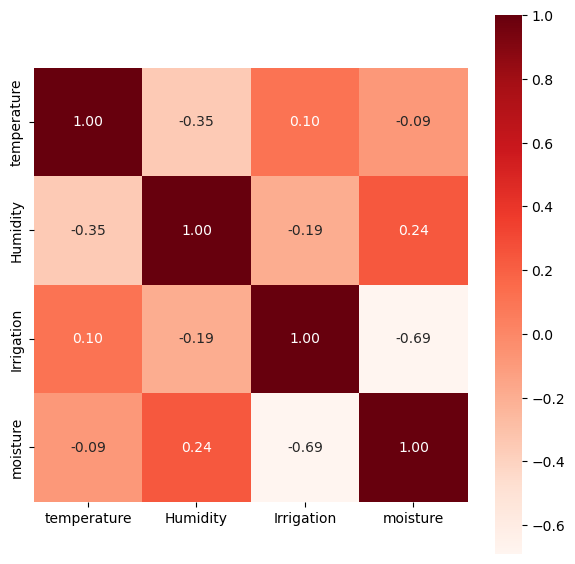

In [10]:
plt.figure(figsize=(7,7))
sns.heatmap(corr,cbar=True,square=True,fmt=".2f",annot=True,annot_kws={"size":10},cmap="Reds")
plt.show()

In [11]:
## spliting the input and output data
#Features and target dataset
x=df[["temperature","Humidity","moisture"]]
x.head()
# type(x)

,temperature,Humidity,moisture
0,30,15,60.937500
1,30,32,80.468750
2,21,28,70.703125
3,40,22,51.171875
4,23,34,31.640625


In [12]:
# y=df["Irrigation"]
y=df["Irrigation"]
y.head()


0    0
1    0
2    0
3    0
4    0
Name: Irrigation, dtype: int64

In [13]:
# Spliting training and splitting data

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)
# y_test

In [15]:
# Standard scalling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()



In [16]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


# Logistic Regression

In [17]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [18]:
model2=LogisticRegression()

In [19]:
model2.fit(x_train,y_train)

LogisticRegression()

In [20]:
# Accuracy on training data
y_train_predicted=model2.predict(x_train)
score_train=accuracy_score(y_train_predicted,y_train)
print(score_train)

0.84


In [21]:
# Accuracy on testing data
y_test_predicted=model2.predict(x_test)
score_test=accuracy_score(y_test_predicted,y_test)
print(score_test)

0.8823529411764706


In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_predicted)
cm

array([[30,  1],
       [ 5, 15]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

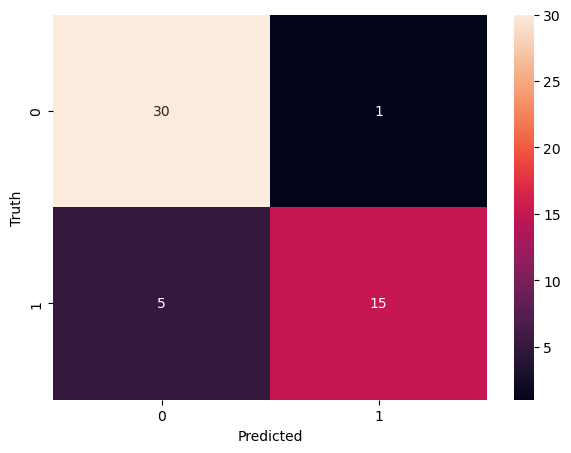

In [23]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        31
           1       0.94      0.75      0.83        20

    accuracy                           0.88        51
   macro avg       0.90      0.86      0.87        51
weighted avg       0.89      0.88      0.88        51



In [25]:
# Testing for input data
input_data=(42,64,10)
data=np.asarray(input_data).reshape(1,-1)
prediction=model2.predict(data)
print(prediction)



[1]


# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn=KNeighborsClassifier(n_neighbors=100)

In [28]:
knn.fit(x_train,y_train)
y_train_predicted=knn.predict(x_train)
accuracy1=accuracy_score(y_train_predicted,y_train)
accuracy1

C:\Users\agraw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8088888888888889

In [29]:
y_test_predicted=knn.predict(x_test)
accuracy2=accuracy_score(y_test_predicted,y_test)
accuracy2

C:\Users\agraw\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8823529411764706

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_predicted)
cm

array([[30,  1],
       [ 5, 15]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

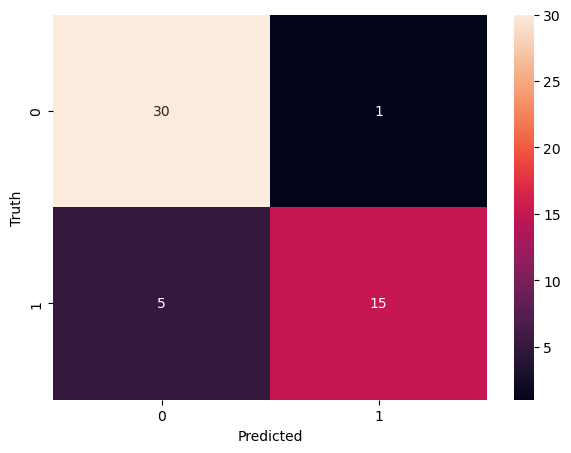

In [31]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Raandom Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model4=RandomForestClassifier(n_estimators=2)
model4.fit(x_train,y_train)


RandomForestClassifier(n_estimators=2)

In [34]:
y_train_predicted=model4.predict(x_train)
accuracy1=accuracy_score(y_train_predicted,y_train)
accuracy1

0.92

In [35]:
y_test_predicted=model4.predict(x_test)
accuracy2=accuracy_score(y_test_predicted,y_test)
accuracy2

0.8431372549019608

In [36]:
cm=confusion_matrix(y_test,y_test_predicted)
cm

array([[31,  0],
       [ 8, 12]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

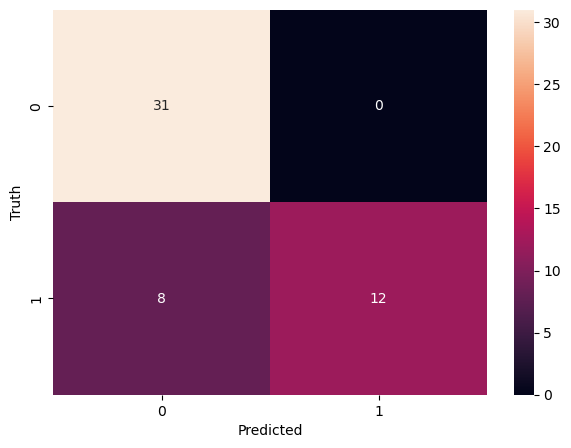

In [37]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89        31
           1       1.00      0.60      0.75        20

    accuracy                           0.84        51
   macro avg       0.90      0.80      0.82        51
weighted avg       0.88      0.84      0.83        51



# Decision tree

In [39]:
from sklearn import tree

In [40]:
model5=tree.DecisionTreeClassifier()

In [41]:
model5.fit(x_train,y_train)


DecisionTreeClassifier()

In [42]:
y_train_predicted=model5.predict(x_train)
accuracy=accuracy_score(y_train_predicted,y_train)
accuracy

1.0

In [43]:
y_test_predicted=model5.predict(x_test)
accuracy1=accuracy_score(y_test_predicted,y_test)
accuracy1

0.8431372549019608

In [44]:
cm=confusion_matrix(y_test,y_test_predicted)
cm

array([[29,  2],
       [ 6, 14]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        31
           1       0.88      0.70      0.78        20

    accuracy                           0.84        51
   macro avg       0.85      0.82      0.83        51
weighted avg       0.85      0.84      0.84        51



Text(58.222222222222214, 0.5, 'Truth')

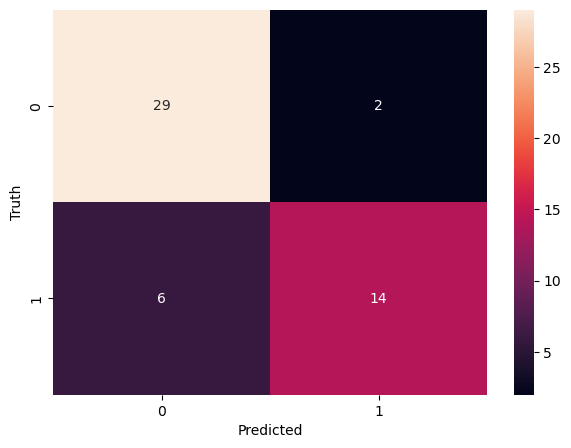

In [46]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Saving the trained model

In [47]:
import pickle

In [48]:
file_name="trained_model1.pkl"
pickle.dump(model2,open(file_name,'wb'))

In [49]:
# loading the saved model
loaded_model=pickle.load(open("trained_model1.pkl",'rb'))

In [51]:
input_data=(10,90,50)
data=np.asarray(input_data).reshape(1,-1)
prediction=loaded_model.predict(data)
print(prediction)

if prediction[0]==0:
    print("Does not required to irrigate")
else:
    print("required to irrigate")

[0]
Does not required to irrigate
